In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

#Experiment with Algorithm-1

In [2]:
def q_x(x, a):
    return 1 + a*x

In [3]:
def generate_data_exp1(n, l, u, a):
    x = np.empty(n, dtype=float)
    for i in range(n):
        x[i] = l + (u-l) * rd.random()
    q = np.empty(n, dtype=float)
    for i in range(n):
        q[i] = q_x(x[i], a) + rd.normalvariate(0,0.001)
    return x, q

In [4]:
X, Q = generate_data_exp1(1000, -50, 50, 5)

In [5]:
def squared_loss_exp1(x, a, q):
    return (q_x(x, a) - q)**2

In [6]:
def func_est_exp1(X, Q, a, s):
    samp = np.empty(s, dtype = int)
    for i in range(s):
        samp[i] = rd.randint(0, Q.size-1)
    res = 0.0
    for j in range(s):
        res = res + squared_loss_exp1(X[samp[j]], a, Q[samp[j]])
    return res/s

In [7]:
def grad_est_exp1(X, Q, a, s):
    samp = np.empty(s, dtype = int)
    for i in range(s):
        samp[i] = rd.randint(0, Q.size-1)
    res = 0.0
    for j in range(s):
        res = res + 2*X[samp[j]]*np.sqrt(squared_loss_exp1(X[j], a, Q[samp[j]]))
    return res/s

In [8]:
def norm(x):
    return abs(x)

In [9]:
T = 200

def ArmijoLS_exp1(X, Q, x_0):
    theta = 1e-1
    delta_max = 6
    alpha_max = 4
    gamma = 2
    sampsize = 100

    x = np.empty(1000, dtype=float)
    alpha = np.empty(1000, dtype=float)
    g = np.empty(1000, dtype=float)
    s = np.empty(1000, dtype=float)
    f0 = np.empty(1000, dtype=float)
    fs = np.empty(1000, dtype=float)
    delta = np.empty(1000, dtype=float)
    
    grad = []
    pt = []
    func = []
    
    alpha[0] = 2
    delta[0] = 5
    x[0] = x_0
    final_x = x_0

    for k in range(T):
        g[k] = grad_est_exp1(X, Q, x[k], sampsize)
        grad.append(g[k])
        pt.append(x[k])
        func.append(abs(func_est_exp1(X, Q, x[k], sampsize)))
        
        print("Iteration:", k)
        print("gradient:", g[k])
        print("alpha:", alpha[k])
        print("delta:", delta[k])
        print("current iterate:", x[k])
        
        s[k] = -alpha[k] * g[k]
        f0[k] = func_est_exp1(X, Q, x[k], sampsize)
        fs[k] = func_est_exp1(X, Q, x[k] + s[k], sampsize)
        if(abs(f0[k]-f0[k-1])<1e-4):
            print("Optima is already achieved so further iterations are skipped")
            break
        if(fs[k] <= f0[k] - alpha[k] * theta * norm(g[k])**2):
            x[k+1] = x[k] - alpha[k] * g[k]
            final_x = x[k+1]
            print("iterate changes to: ", x[k+1])
            alpha[k+1] = min(alpha_max, gamma * alpha[k])
            if(alpha[k] * g[k]**2 >= delta[k]**2):
                delta[k+1] = np.sqrt(gamma * delta[k]**2)
            else:
                delta[k+1] = np.sqrt((delta[k]**2)/gamma)
        else:
            x[k+1] = x[k]
            alpha[k+1] = alpha[k]/gamma
            delta[k+1] = delta[k]/np.sqrt(gamma)

    plt.rcParams["figure.figsize"]=(20, 5)
    plt.subplot(1, 2, 1)
    plt.plot(grad)
    plt.xlabel("Iteration")
    plt.ylabel("Gradient")
    plt.title("Gradient vs Iteration (on log-scale)")
    plt.yscale("symlog")
    plt.subplot(1, 2, 2)
    plt.plot(grad)
    plt.xlabel("iteration")
    plt.ylabel("gradient")
    plt.title("Gradient vs Iteration (on normal-scale)")
    plt.show()
    plt.rcParams["figure.figsize"]=(20, 5)
    plt.subplot(1, 2, 1)
    plt.plot(func)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.yscale("symlog")
    plt.title("Error vs Iteration (on log-scale)")
    plt.subplot(1, 2, 2)
    plt.plot(func)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title("Error vs Iteration (on normal-scale)")
    plt.show()
    plt.rcParams["figure.figsize"]=(20, 5)
    plt.subplot(1, 2, 1)
    plt.plot(pt)
    plt.xlabel("Iteration")
    plt.ylabel("Iterate")
    plt.yscale("symlog")
    plt.title("Iterate vs Iteration (on log-scale)")
    plt.subplot(1, 2, 2)
    plt.plot(pt)
    plt.xlabel("Iteration")
    plt.ylabel("Iterate")
    plt.title("Iterate vs Iteration (on normal-scale)")
    plt.show()

    return final_x

Iteration: 0
gradient: 214.93792541497234
alpha: 2.0
delta: 5.0
current iterate: 10.0
Iteration: 1
gradient: -1100.3137535439243
alpha: 1.0
delta: 3.5355339059327373
current iterate: 10.0
Iteration: 2
gradient: 498.1529423631035
alpha: 0.5
delta: 2.4999999999999996
current iterate: 10.0
Iteration: 3
gradient: 4770.089363887296
alpha: 0.25
delta: 1.7677669529663684
current iterate: 10.0
Iteration: 4
gradient: -3269.237960576891
alpha: 0.125
delta: 1.2499999999999996
current iterate: 10.0
Iteration: 5
gradient: 1766.1147213818967
alpha: 0.0625
delta: 0.883883476483184
current iterate: 10.0
Iteration: 6
gradient: 2400.2281944219294
alpha: 0.03125
delta: 0.6249999999999997
current iterate: 10.0
Iteration: 7
gradient: 2246.05888894353
alpha: 0.015625
delta: 0.44194173824159194
current iterate: 10.0
Iteration: 8
gradient: 5872.047634580072
alpha: 0.0078125
delta: 0.3124999999999998
current iterate: 10.0
Iteration: 9
gradient: -1893.0046022413496
alpha: 0.00390625
delta: 0.22097086912079594
c

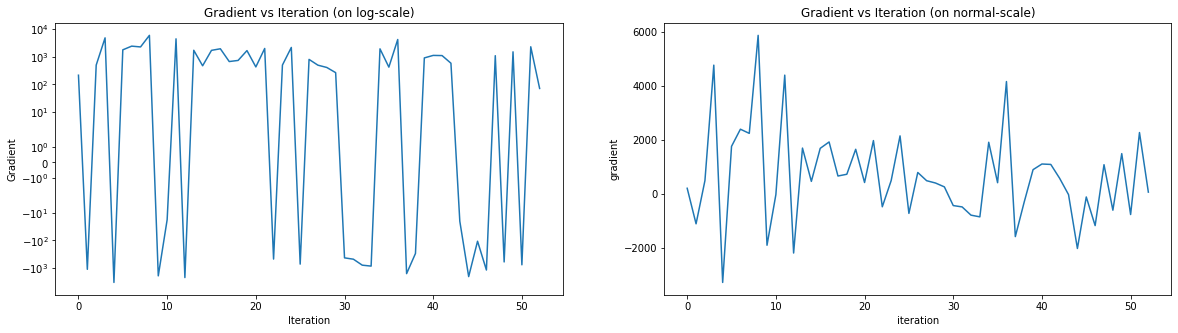

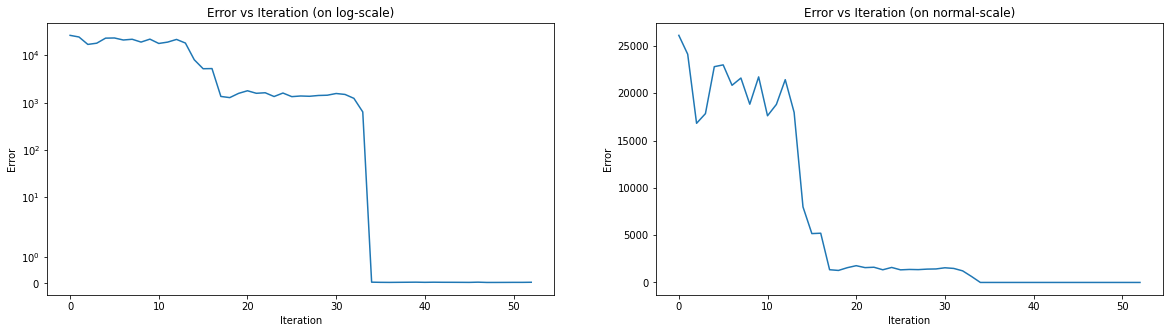

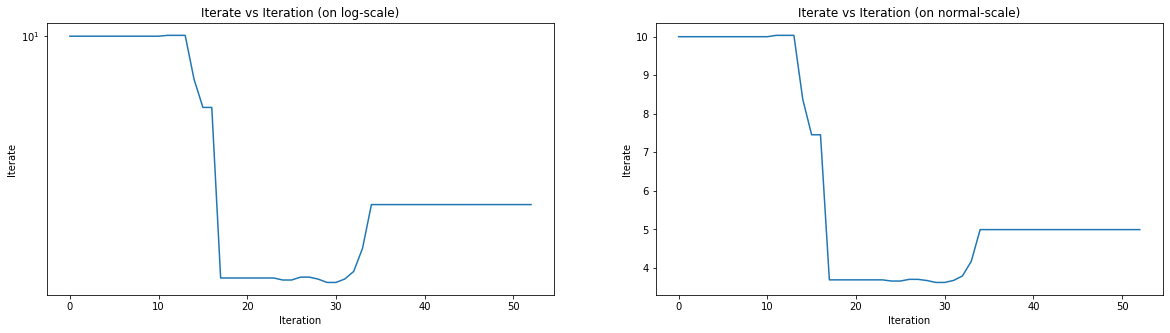

4.993793634037582

In [10]:
a_0 = 10
ArmijoLS_exp1(X, Q, a_0)

# Experiment with Algorithm-3

In [11]:
# H(x, y) =     (1+x^2)*(1-y^2)
# H_new(x, y) = (1+x^2)*(1000-y^2)
def func_est(y, f_what, x_star):
    if(f_what == 1):
        return -(1 + x_star**2)*(1000 - y**2)
    else:
        return (1 + y**2)*(1000 - x_star**2)

# g_x = (1-y^2)*2*x
# g_y = (1+x^2)*(-2)*y
def grad_est(y, f_what, x_star):
    if(f_what == 1):
        return -(1 + x_star**2)*(-2)*y
    else:
        return (1000 - x_star**2)*(2)*y

def norm(x):
    return abs(x)

In [12]:
T = 40 #100

def ArmijoLS(x_0, f_what, y_star, x_comp, fx, grad_x):
    theta = 0.1
    delta_max = 6
    alpha_max = 4
    gamma = 2

    x = np.empty(1000, dtype=float)
    alpha = np.empty(1000, dtype=float)
    g = np.empty(1000, dtype=float)
    s = np.empty(1000, dtype=float)
    f0 = np.empty(1000, dtype=float)
    fs = np.empty(1000, dtype=float)
    delta = np.empty(1000, dtype=float)

    grad = []
    pt = []
    func = []

    alpha[0] = 2
    delta[0] = 5
    x[0] = x_0
    final_x = x_0

    for k in range(T):
        g[k] = grad_est(x[k], f_what, y_star)

        grad.append(g[k])
        pt.append(x[k])
        func.append(abs(func_est(x[k], f_what, y_star)))

        x_comp.append(x[k])
        fx.append(abs(func_est(x[k], f_what, y_star)))
        grad_x.append(grad_est(x[k], f_what, y_star))

        if(abs(g[k])<1e-5):
            print("Optima is already achieved so further iterations are skipped")
            return final_x

        # print("gradient:", g[k])
        # print("alpha:", alpha[k])
        # print("delta:", delta[k])
        # print("current iterate:", x[k])

        s[k] = -alpha[k] * g[k]
        f0[k] = func_est(x[k], f_what, y_star)
        fs[k] = func_est(x[k] + s[k], f_what, y_star)

        if(fs[k] <= f0[k] - alpha[k] * theta * norm(g[k])**2):
            x[k+1] = x[k] - alpha[k] * g[k]
            final_x = x[k+1]

            print("iterate changes to: ", x[k] - alpha[k] * g[k])
            alpha[k+1] = min(alpha_max, gamma * alpha[k])
            if(alpha[k] * g[k]**2 >= delta[k]**2):
                delta[k+1] = np.sqrt(gamma * delta[k]**2)
            else:
                delta[k+1] = np.sqrt((delta[k]**2)/gamma)
        else:
            x[k+1] = x[k]
            alpha[k+1] = alpha[k]/gamma
            delta[k+1] = delta[k]/np.sqrt(gamma)

    plt.rcParams["figure.figsize"]=(20, 5)
    plt.subplot(1, 2, 1)
    plt.plot(grad)
    plt.xlabel("Iteration")
    plt.ylabel("Gradient")
    plt.title("Gradient vs Iteration (on log-scale)")
    plt.yscale("symlog")
    plt.subplot(1, 2, 2)
    plt.plot(grad)
    plt.xlabel("Iteration")
    plt.ylabel("Gradient")
    plt.title("Gradient vs Iteration (on normal-scale)")
    plt.show()
    plt.rcParams["figure.figsize"]=(20, 5)
    plt.subplot(1, 2, 1)
    plt.plot(func)
    plt.xlabel("Iteration")
    plt.ylabel("Function-value")
    plt.yscale("symlog")
    plt.title("Function-value vs Iteration (on log-scale)")
    plt.subplot(1, 2, 2)
    plt.plot(func)
    plt.xlabel("Iteration")
    plt.ylabel("Function-value")
    plt.title("Function-value vs Iteration (on normal-scale)")
    plt.show()
    plt.rcParams["figure.figsize"]=(20, 5)
    plt.subplot(1, 2, 1)
    plt.plot(pt)
    plt.xlabel("Iteration")
    plt.ylabel("Iterate")
    plt.yscale("symlog")
    plt.title("Iterate vs Iteration (on log-scale)")
    plt.subplot(1, 2, 2)
    plt.plot(pt)
    plt.xlabel("Iteration")
    plt.ylabel("Iterate")
    plt.title("Iterate vs Iteration (on normal-scale)")
    plt.show()

    return final_x

iterate changes to:  1.1581182479858398
iterate changes to:  0.05364951505271165
iterate changes to:  0.002485299295125455
iterate changes to:  0.0001151308186156455
iterate changes to:  5.333404077773071e-06
iterate changes to:  2.4706850345404304e-07
iterate changes to:  -2.2417774006582864e-07
iterate changes to:  2.0340779354083163e-07
iterate changes to:  -1.8456217134225774e-07
iterate changes to:  1.674625858607091e-07


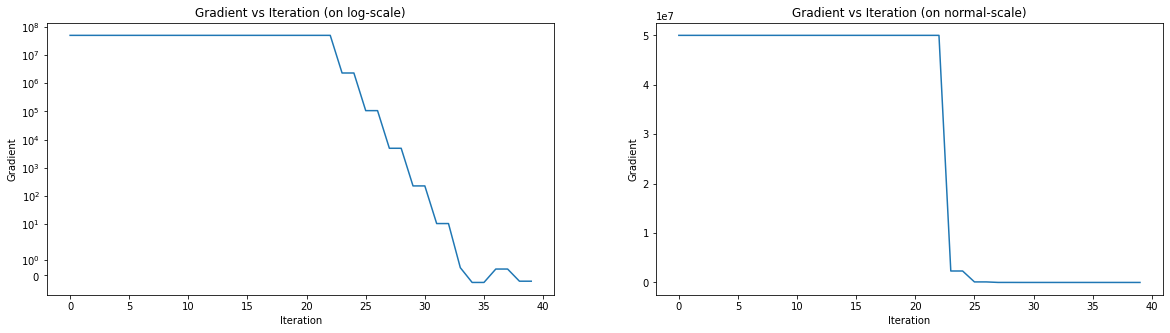

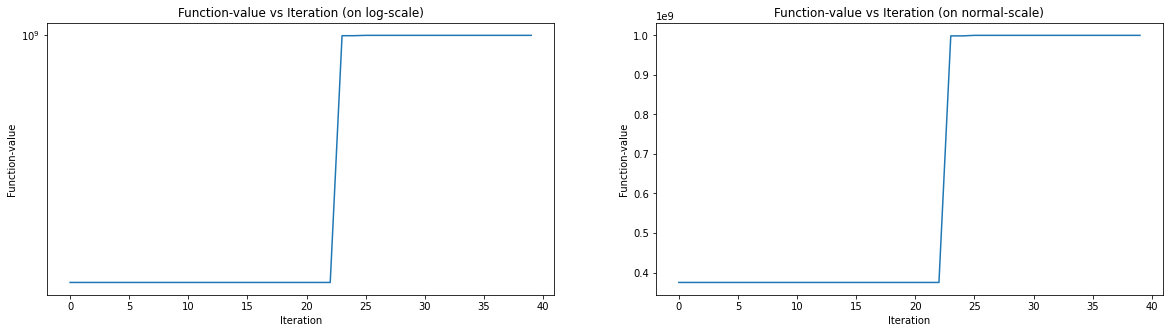

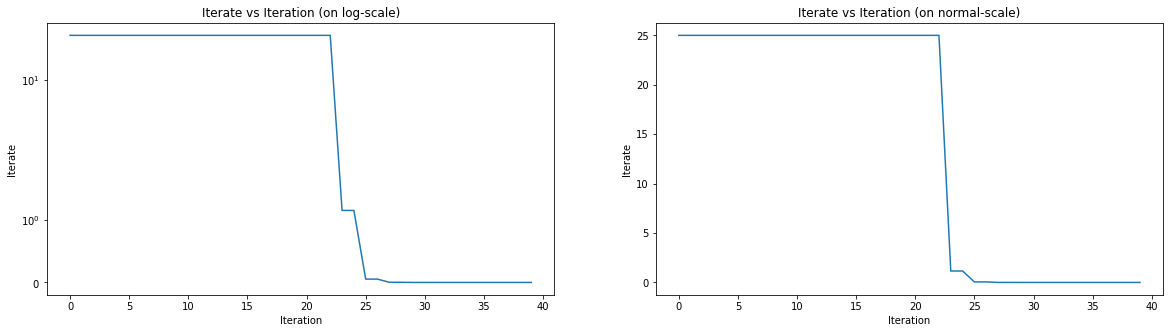

iterate changes to:  23.4375
iterate changes to:  0.54931640625
iterate changes to:  0.012874603271484375
iterate changes to:  0.00030174851417541504
iterate changes to:  7.07223080098629e-06
iterate changes to:  1.6575540939811617e-07
iterate changes to:  3.884892407768348e-09
Optima is already achieved so further iterations are skipped
After iteration:  0
X:  3.884892407768348e-09
Y:  1.674625858607091e-07
Optima is already achieved so further iterations are skipped
Optima is already achieved so further iterations are skipped
After iteration:  1
X:  3.884892407768348e-09
Y:  1.674625858607091e-07
Optima is already achieved so further iterations are skipped
Optima is already achieved so further iterations are skipped
After iteration:  2
X:  3.884892407768348e-09
Y:  1.674625858607091e-07
Optima is already achieved so further iterations are skipped
Optima is already achieved so further iterations are skipped
After iteration:  3
X:  3.884892407768348e-09
Y:  1.674625858607091e-07
Optima

In [13]:
x_comp = []
fx = []
y_comp = []
fy = []
fxy = []
grad_x = []
grad_y = []
gradx = []
grady = []

ptx = []
pty = []
Hxy = []

def optimize_minimax(x_0, y_0):
    n = 10
    X = np.empty(n+1, dtype=float)
    Y = np.empty(n+1, dtype=float)
    K = n

    X[0] = x_0
    Y[0] = y_0

    ptx.append(X[0])
    pty.append(Y[0])
    grady.append(grad_est(Y[0], 1, X[0]))
    gradx.append(grad_est(X[0], 2, Y[0]))
    Hxy.append(func_est(X[0], 2, Y[0]))

    for t in range(K):
        Y[t+1] = ArmijoLS(Y[t], 1, X[t], y_comp, fxy, grad_y)
        X[t+1] = ArmijoLS(X[t], 2, Y[t+1], x_comp, fxy, grad_x)

        ptx.append(X[t+1])
        pty.append(Y[t+1])
        grady.append(grad_est(Y[t+1], 1, X[t+1]))
        gradx.append(grad_est(X[t+1], 2, Y[t+1]))
        Hxy.append(func_est(X[t+1], 2, Y[t+1]))
        print("After iteration: ", t)
        print("X: ", X[t+1])
        print("Y: ", Y[t+1])

optimize_minimax(1000, 25)

Text(0.5, 1.0, 'y-iterates vs iterations for outer loop (on log-scale)')

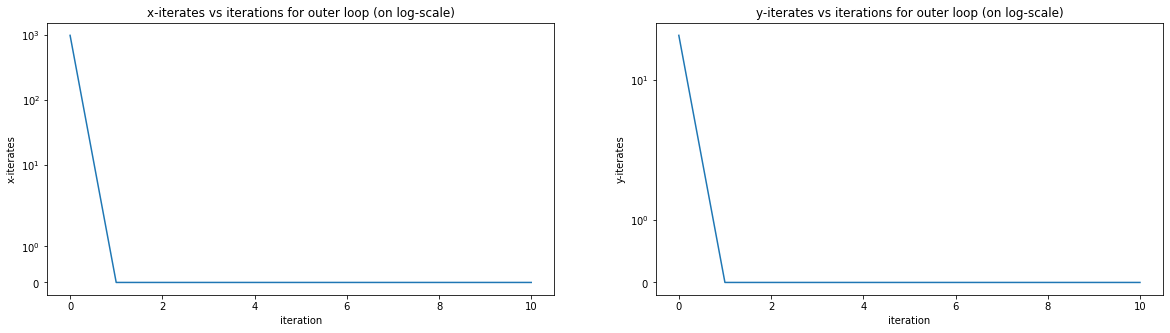

In [14]:
plt.rcParams["figure.figsize"]=(20, 5)
plt.subplot(1, 2, 1)
plt.plot(ptx)
plt.xlabel("iteration")
plt.ylabel("x-iterates")
plt.yscale("symlog")
plt.title("x-iterates vs iterations for outer loop (on log-scale)")
plt.subplot(1, 2, 2)
plt.plot(pty)
plt.xlabel("iteration")
plt.ylabel("y-iterates")
plt.yscale("symlog")
plt.title("y-iterates vs iterations for outer loop (on log-scale)")

Text(0.5, 1.0, 'y-gradient vs iterations for outer loop (on log-scale)')

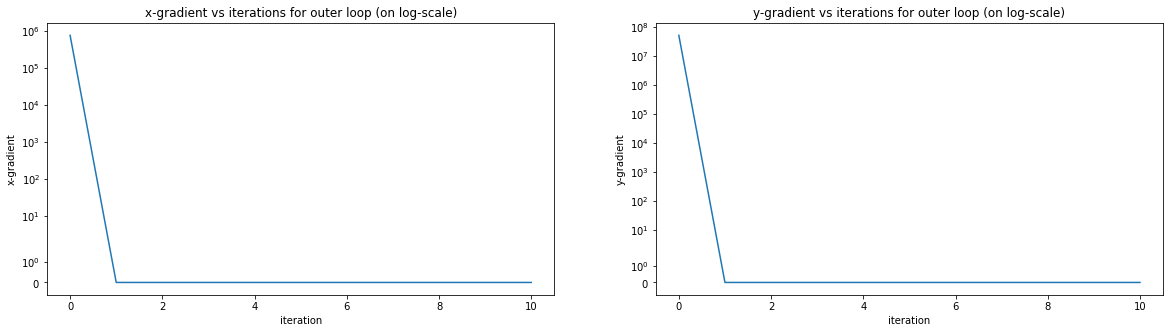

In [15]:
plt.rcParams["figure.figsize"]=(20, 5)
plt.subplot(1, 2, 1)
plt.plot(gradx)
plt.xlabel("iteration")
plt.ylabel("x-gradient")
plt.yscale("symlog")
plt.title("x-gradient vs iterations for outer loop (on log-scale)")
plt.subplot(1, 2, 2)
plt.plot(grady)
plt.xlabel("iteration")
plt.ylabel("y-gradient")
plt.yscale("symlog")
plt.title("y-gradient vs iterations for outer loop (on log-scale)")

Text(0.5, 1.0, 'function-value vs iterations for outer loop (on log-scale)')

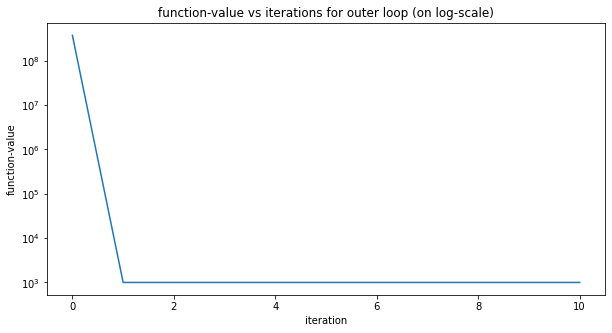

In [16]:
plt.rcParams["figure.figsize"]=(10, 5)
plt.plot(Hxy)
plt.xlabel("iteration")
plt.ylabel("function-value")
plt.yscale("symlog")
plt.title("function-value vs iterations for outer loop (on log-scale)")

Text(0.5, 1.0, 'y-iterates vs iterations for entire run (on log-scale)')

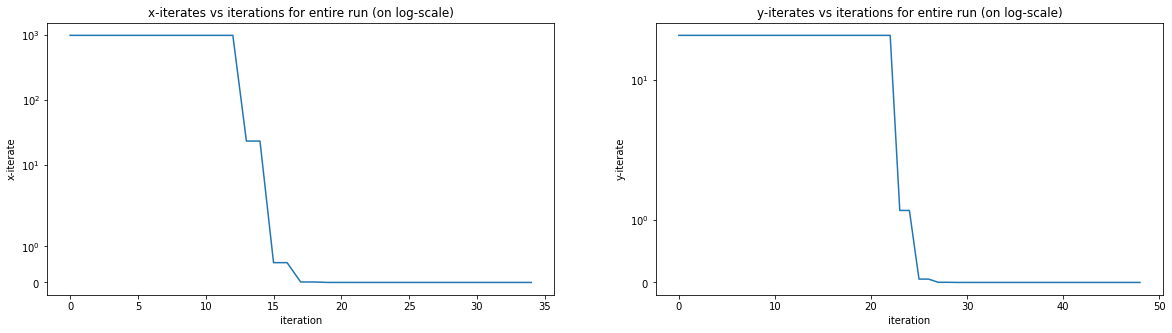

In [17]:
plt.rcParams["figure.figsize"]=(20, 5)
plt.subplot(1, 2, 1)
plt.plot(x_comp)
plt.xlabel("iteration")
plt.ylabel("x-iterate")
plt.yscale("symlog")
plt.title("x-iterates vs iterations for entire run (on log-scale)")
plt.subplot(1, 2, 2)
plt.plot(y_comp)
plt.xlabel("iteration")
plt.ylabel("y-iterate")
plt.yscale("symlog")
plt.title("y-iterates vs iterations for entire run (on log-scale)")

Text(0.5, 1.0, 'y-gradient vs iterations for entire run (on log-scale)')

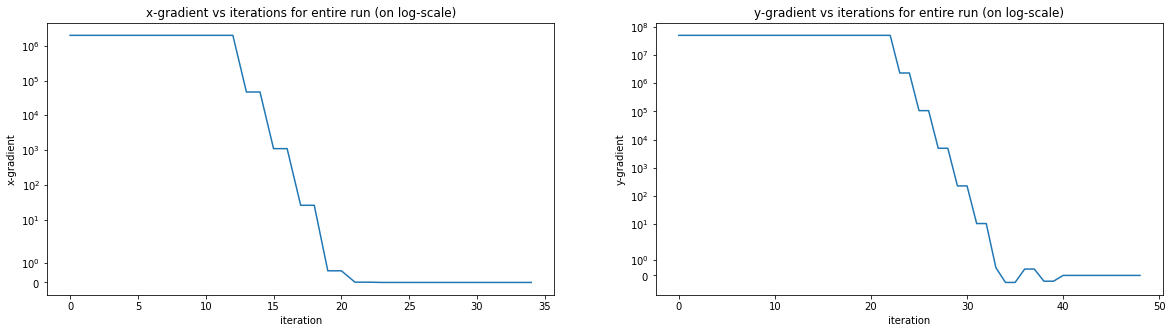

In [18]:
plt.rcParams["figure.figsize"]=(20, 5)
plt.subplot(1, 2, 1)
plt.plot(grad_x)
plt.xlabel("iteration")
plt.ylabel("x-gradient")
plt.yscale("symlog")
plt.title("x-gradient vs iterations for entire run (on log-scale)")
plt.subplot(1, 2, 2)
plt.plot(grad_y)
plt.xlabel("iteration")
plt.ylabel("y-gradient")
plt.yscale("symlog")
plt.title("y-gradient vs iterations for entire run (on log-scale)")

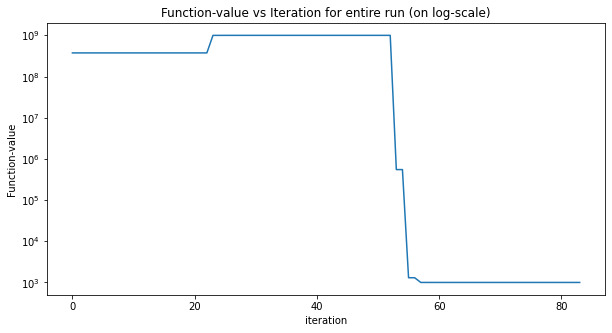

In [26]:
plt.rcParams["figure.figsize"]=(10, 5)
plt.plot(fxy)
plt.xlabel("iteration")
plt.ylabel("Function-value")
plt.title("Function-value vs Iteration for entire run (on log-scale)")
plt.yscale("symlog")

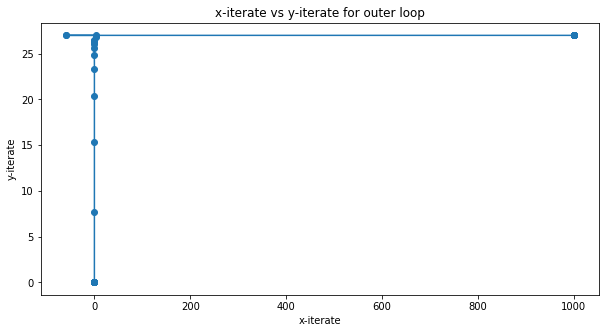

In [27]:
plt.rcParams["figure.figsize"]=(10, 5)
plt.scatter(ptx, pty)
plt.plot(ptx, pty)
plt.xlabel("x-iterate")
plt.ylabel("y-iterate")
plt.title("x-iterate vs y-iterate for outer loop")
plt.show()

# Experiment with Algorithm-5

In [21]:
def UniStepArmijoLS(x_0, f_what, y_star, theta, delta, alpha, delta_max, alpha_max, gamma, x_comp, fx, grad_x):
    x = np.empty(1000, dtype=float)
    g = np.empty(1000, dtype=float)
    s = np.empty(1000, dtype=float)
    f0 = np.empty(1000, dtype=float)
    fs = np.empty(1000, dtype=float)
    delta_next = 0
    alpha_next = 0

    grad = []
    pt = []
    func = []

    x[0] = x_0
    final_x = x_0

    x_comp.append(x_0)
    fx.append(func_est(x_0, f_what, y_star))
    grad_x.append(grad_est(x_0, f_what, y_star))

    for k in range(1):
        g[k] = grad_est(x[k], f_what, y_star)

        grad.append(g[k])
        pt.append(x[k])
        func.append(func_est(x[k], f_what, y_star))

        # print("gradient:", g[k])
        # print("alpha:", alpha)
        # print("delta:", delta)
        # print("current iterate:", x[k])

        s[k] = -alpha * g[k]
        f0[k] = func_est(x[k], f_what, y_star)
        fs[k] = func_est(x[k] + s[k], f_what, y_star)

        if(fs[k] <= f0[k] - alpha * theta * norm(g[k])**2):
            x[k+1] = x[k] - alpha * g[k]
            final_x = x[k+1]

            x_comp.append(x[k+1])
            fx.append(func_est(x[k+1], f_what, y_star))
            grad_x.append(grad_est(x[k+1], f_what, y_star))

            # print("iterate changes to: ", x[k] - alpha * g[k])
            
            alpha_next = min(alpha_max, gamma * alpha)
            if(alpha * g[k]**2 >= delta**2):
                delta_next = np.sqrt(gamma * delta**2)
            else:
                delta_next = np.sqrt((delta**2)/gamma)
        else:
            x[k+1] = x[k]
            alpha_next = alpha/gamma
            delta_next = delta/np.sqrt(gamma)
    return final_x, delta_next, alpha_next

In [28]:
x_comp = []
fx = []
y_comp = []
fy = []
grad_x = []
grad_y = []
gradx = []
grady = []

ptx = []
pty = []
Hxy = []

def coupled_optimize_minimax(x_0, y_0):
    n = 1000
    X = np.empty(n+1, dtype=float)
    Y = np.empty(n+1, dtype=float)

    K = n
    X[0] = x_0
    Y[0] = y_0

    ptx.append(X[0])
    pty.append(Y[0])
    grady.append(grad_est(Y[0], 1, X[0]))
    gradx.append(grad_est(X[0], 2, Y[0]))
    Hxy.append(func_est(X[0], 2, Y[0]))

    theta = 0.1
    delta_x = 2
    alpha_x = 2
    delta_y = 2
    alpha_y = 2
    delta_max = 6
    alpha_max = 8
    gamma = 2

    for t in range(K):
        Y[t+1], delta_y, alpha_y = UniStepArmijoLS(Y[t], 1, X[t],  theta, delta_y, alpha_y, delta_max, alpha_max, gamma, y_comp, fy, grad_y)
        X[t+1], delta_x, alpha_x = UniStepArmijoLS(X[t], 2, Y[t+1],  theta, delta_x, alpha_x, delta_max, alpha_max, gamma, x_comp, fx, grad_x)

        ptx.append(X[t+1])
        pty.append(Y[t+1])
        grady.append(grad_est(Y[t+1], 1, X[t+1]))
        gradx.append(grad_est(X[t+1], 2, Y[t+1]))
        Hxy.append(func_est(X[t+1], 2, Y[t+1]))

        if(abs(grad_est(X[t+1], 2, Y[t+1]))<1e-5 and abs(grad_est(Y[t+1], 1, X[t+1]))<1e-5):
            print("Optima is already achieved so further iterations are skipped")
            break

        print("After iteration: ", t)
        print("X: ", X[t+1])
        print("Y: ", Y[t+1])

coupled_optimize_minimax(1000, 27)

After iteration:  0
X:  1000.0
Y:  27.0
After iteration:  1
X:  1000.0
Y:  27.0
After iteration:  2
X:  1000.0
Y:  27.0
After iteration:  3
X:  1000.0
Y:  27.0
After iteration:  4
X:  1000.0
Y:  27.0
After iteration:  5
X:  1000.0
Y:  27.0
After iteration:  6
X:  1000.0
Y:  27.0
After iteration:  7
X:  1000.0
Y:  27.0
After iteration:  8
X:  1000.0
Y:  27.0
After iteration:  9
X:  1000.0
Y:  27.0
After iteration:  10
X:  -58.59375
Y:  27.0
After iteration:  11
X:  -58.59375
Y:  27.0
After iteration:  12
X:  3.4332275390625
Y:  27.0
After iteration:  13
X:  3.4332275390625
Y:  26.831420709939266
After iteration:  14
X:  -0.5624930681522162
Y:  26.496367239227975
After iteration:  15
X:  -0.5624930681522162
Y:  26.42824267514613
After iteration:  16
X:  0.11582227655104371
Y:  26.292343855852288
After iteration:  17
X:  0.11582227655104371
Y:  26.084179399731056
After iteration:  18
X:  -0.03845309880476602
Y:  25.671146689685692
After iteration:  19
X:  -0.03845309880476602
Y:  24.86773

Text(0.5, 1.0, 'function-value vs iteration (on log-scale)')

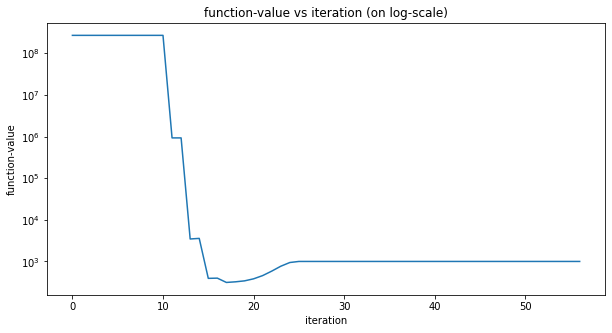

In [29]:
plt.rcParams["figure.figsize"]=(10, 5)
plt.plot(Hxy)
plt.xlabel("iteration")
plt.ylabel("function-value")
plt.yscale("symlog")
plt.title("function-value vs iteration (on log-scale)")

Text(0.5, 1.0, 'y-gradient vs iteration (on log-scale)')

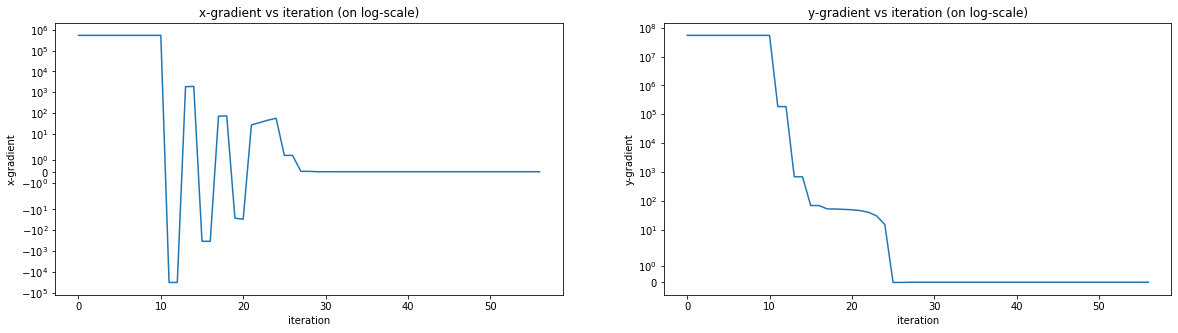

In [30]:
plt.rcParams["figure.figsize"]=(20, 5)
plt.subplot(1, 2, 1)
plt.plot(gradx)
plt.xlabel("iteration")
plt.ylabel("x-gradient")
plt.yscale("symlog")
plt.title("x-gradient vs iteration (on log-scale)")
plt.subplot(1, 2, 2)
plt.plot(grady)
plt.xlabel("iteration")
plt.ylabel("y-gradient")
plt.yscale("symlog")
plt.title("y-gradient vs iteration (on log-scale)")

Text(0.5, 1.0, 'y-iterates vs iteration (on log-scale)')

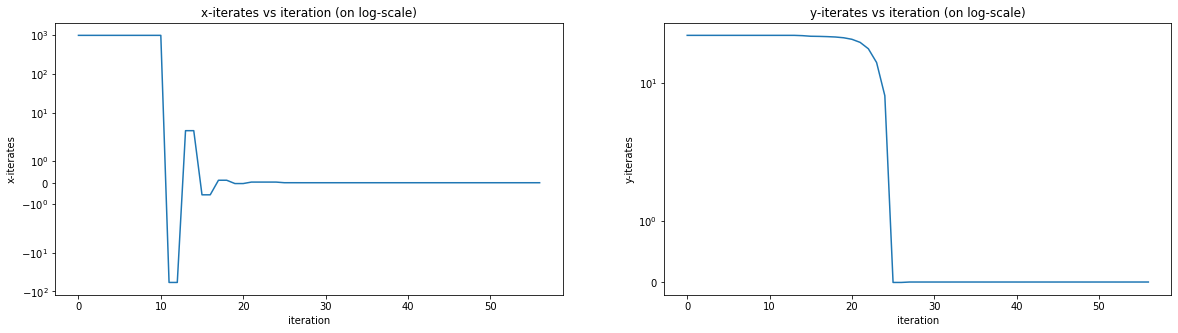

In [31]:
plt.rcParams["figure.figsize"]=(20, 5)
plt.subplot(1, 2, 1)
plt.plot(ptx)
plt.xlabel("iteration")
plt.ylabel("x-iterates")
plt.yscale("symlog")
plt.title("x-iterates vs iteration (on log-scale)")
plt.subplot(1, 2, 2)
plt.plot(pty)
plt.xlabel("iteration")
plt.ylabel("y-iterates")
plt.yscale("symlog")
plt.title("y-iterates vs iteration (on log-scale)")